In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
def make_image(size, text, x_position, y_position, font, font_scale, bgr_color, thickness):
  image = np.ones(size, dtype=np.uint8)
  image = cv.putText(image, text, (x_position, y_position), font, font_scale, bgr_color, thickness)
  return image

In [ ]:
def make_parts(image):
  part_1 = np.ones((image.shape[0], 2 * image.shape[1]), dtype=np.uint8)
  part_2 = np.ones((image.shape[0], 2 * image.shape[1]), dtype=np.uint8)
  
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):    
      p = np.random.random()
      if (image[i,j] == 1 and p < 0.5):
        part_1[i, 2*j] = 1
        part_1[i, 2*j+1] = 0
        part_2[i, 2*j] = 1
        part_2[i, 2*j+1] = 0
      elif (image[i,j] == 1 and p >= 0.5):
        part_1[i, 2*j] = 0
        part_1[i, 2*j+1] = 1
        part_2[i, 2*j] = 0
        part_2[i, 2*j+1] = 1
      elif (image[i,j] == 0 and p < 0.5):
        part_1[i, 2*j] = 1
        part_1[i, 2*j+1] = 0
        part_2[i, 2*j] = 0
        part_2[i, 2*j+1] = 1
      elif (image[i,j] == 0 and p >= 0.5):
        part_1[i, 2*j] = 0
        part_1[i, 2*j+1] = 1
        part_2[i, 2*j] = 1
        part_2[i, 2*j+1] = 0

  return part_1, part_2

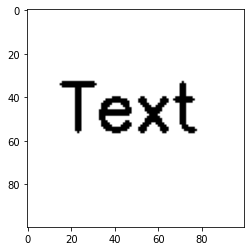

In [ ]:
image = make_image((100,100), "Text", 15, 55, cv.FONT_ITALIC, 1, (0,0,0), 2)
plt.imshow(image, cmap="gray");

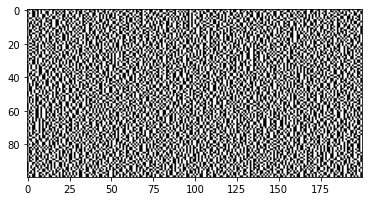

In [ ]:
part_1, part_2 = make_parts(image)
plt.imshow(part_1, cmap="gray");

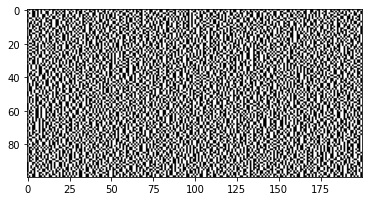

In [ ]:
plt.imshow(part_2, cmap="gray");

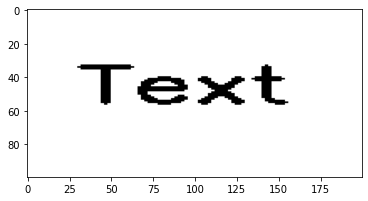

In [ ]:
z = np.logical_not(np.logical_xor(part_1,part_2))
y = np.logical_and(part_1, part_2)
plt.imshow(z, cmap="gray");

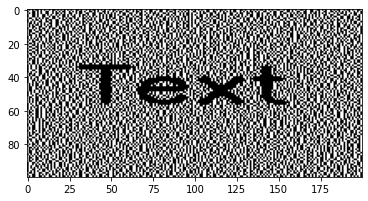

In [ ]:
plt.imshow(y, cmap="gray");